# Pima Indians Dataset

Import library

In [30]:
import pandas as pd
from math import sqrt
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter

Persiapan Data

In [31]:
# Membaca dataset
dataset = pd.read_csv('DiabetesAsli.csv')
# Menandakan angka 0 dengan NaN
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
dataset[cols] = dataset[cols].replace(0, np.NaN)
# Mengisi NaN dengan rata-rata
dataset.fillna(dataset.mean(), inplace=True)

Normalisasi Data

In [32]:
# Menemukan nilai minimum dan nilai maksimum pada suatu kolom
def dataset_minmax(dataset):
    minmax = list()
    for i in range(len(dataset.iloc[0,0:8])):
        value_min = min(dataset.iloc[:,i])
        value_max = max(dataset.iloc[:,i])
        minmax.append([value_min, value_max])
    return minmax

# Normalisasi data menjadi 0-1
def normalize_dataset(dataset, minmax):
    for i in range(len(dataset.iloc[0,0:8])):
        for j in range(len(dataset.iloc[:,1])):
            dataset.iloc[j,i] = (dataset.iloc[j,i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

# Menormalisasi data
minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)

Metode K-NN dari awal

In [33]:
# Menghitung jarak euclidean antar data
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

# Mengambil neighbor yg dekat
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row,dist))
    distances.sort(key=lambda x:x[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

# Menentukan label si test data
def predict_neighbors(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

# Menjadikan prediksi label test data menjadi list
def k_nearest_neighbors(train, test, num_neighbors):
    predictions = list()
    for row in test:
        output = predict_neighbors(train, row, num_neighbors)
        predictions.append(output)
    return predictions

# Membandingkan prediksi label test data dengan yang asli
# Menjadikan persentase
def accuracy_score(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0


Menghitung Akurasi

In [40]:
# Data ada 768, 0-767.
# Train 3: 1 set
#Train 576 0-575, Test 192 576-767
end = int(len(dataset.iloc[:,0].values) / 4 * 3)
X_train = dataset.iloc[0:end,0:8].values
X_test = dataset.iloc[end:,0:8].values
y_train = dataset.iloc[0:end,8].values
y_test = dataset.iloc[end:,8].values

Neighbors - 1 70.3125
Neighbors - 2 70.3125
Neighbors - 3 73.4375
Neighbors - 4 76.04166666666666
Neighbors - 5 77.08333333333334
Neighbors - 6 76.5625
Neighbors - 7 77.08333333333334
Neighbors - 8 79.16666666666666
Neighbors - 9 79.6875
Neighbors - 10 79.16666666666666
Neighbors - 11 79.6875
Neighbors - 12 80.72916666666666
Neighbors - 13 79.16666666666666
Neighbors - 14 81.25
Neighbors - 15 80.72916666666666
Neighbors - 16 81.77083333333334
Neighbors - 17 81.77083333333334
Neighbors - 18 80.20833333333334
Neighbors - 19 81.25
Neighbors - 20 79.6875
Neighbors - 21 81.77083333333334
Neighbors - 22 80.20833333333334
Neighbors - 23 82.8125
Neighbors - 24 79.6875
Neighbors - 25 82.29166666666666
Neighbors - 26 80.72916666666666
Neighbors - 27 81.77083333333334
Neighbors - 28 81.25
Neighbors - 29 80.72916666666666
Neighbors - 30 80.72916666666666


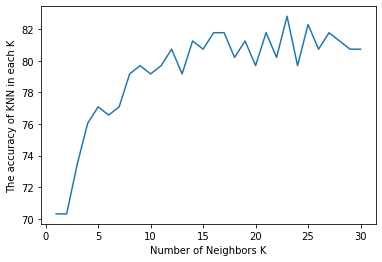

In [41]:
test_neighbors = list(range(1,31))
test_scores = list(range(1,31))
for x in range(len(test_neighbors)):
    predictions = k_nearest_neighbor(X_train, y_train, X_test, test_neighbors[x])
    score = accuracy_score(y_test, predictions)
    test_scores[x] = score
    print("Neighbors -", x+1,test_scores[x])
plt.plot(test_neighbors, test_scores)
plt.xlabel("Number of Neighbors K")
plt.ylabel("The accuracy of KNN in each K")
plt.show()

Metode K-NN dengan SKlearn

Neighbors - 1 0.703125
Neighbors - 2 0.6822916666666666
Neighbors - 3 0.734375
Neighbors - 4 0.7604166666666666
Neighbors - 5 0.7708333333333334
Neighbors - 6 0.7604166666666666
Neighbors - 7 0.7708333333333334
Neighbors - 8 0.7708333333333334
Neighbors - 9 0.796875
Neighbors - 10 0.8020833333333334
Neighbors - 11 0.796875
Neighbors - 12 0.7864583333333334
Neighbors - 13 0.7916666666666666
Neighbors - 14 0.7864583333333334
Neighbors - 15 0.8072916666666666
Neighbors - 16 0.7916666666666666
Neighbors - 17 0.8177083333333334
Neighbors - 18 0.8072916666666666
Neighbors - 19 0.8125
Neighbors - 20 0.7864583333333334
Neighbors - 21 0.8177083333333334
Neighbors - 22 0.8177083333333334
Neighbors - 23 0.828125
Neighbors - 24 0.8177083333333334
Neighbors - 25 0.8229166666666666
Neighbors - 26 0.828125
Neighbors - 27 0.8177083333333334
Neighbors - 28 0.8177083333333334
Neighbors - 29 0.8072916666666666
Neighbors - 30 0.8072916666666666


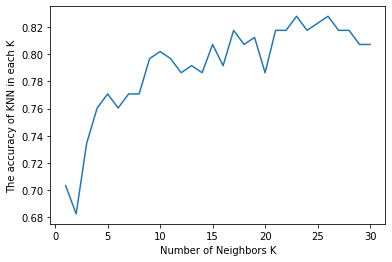

In [36]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
#euclidean distance for p=2, manhatan for p=1. default neighbhors = 5,metric minkowski,p=2
test_neighbors1 = list(range(1,31))
test_scores1 = list(range(1,31))
for x in range(len(test_neighbors1)):
    classifier = KNeighborsClassifier(n_neighbors = x+1, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    test_scores1[x] = classifier.score(X_test,y_test)
    print("Neighbors -", x+1,test_scores1[x])
plt.plot(test_neighbors1,test_scores1)
plt.xlabel("Number of Neighbors K")
plt.ylabel("The accuracy of KNN in each K")
plt.show()

Dari percobaan diatas bisa disimpulkan K yang memiliki akurasi paling tinggi adalah 23.

In [37]:
predictions = k_nearest_neighbor(X_train, y_train, X_test, 23)
score = accuracy_score(y_test, predictions)
print("Akurasinya adalah ",score)

Akurasinya adalah  82.8125
